# 남이 만든 CNN! (pretrained CNN)

## 쉽지만 중요한 코너!

이미 **'잘 만들어진'** 모델들을 가져다가 사용해보자.

[이 링크를 참고해보자](https://keras.io/applications/)


---

### 라이브러리 로딩

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import decode_predictions

from tensorflow.keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt

## 인셉션 모델 바로 가져오기!

[이 코드](https://github.com/fchollet/deep-learning-models/blob/master/inception_v3.py)를 참고하는 것도 도움이 된다!




In [ ]:
model = InceptionV3(weights='imagenet', # 이미지넷 데이터 바탕으로 미리 학습된 것
                    include_top=True,   # 마지막 레이어까지 전부
                    input_shape= (299,299,3))

96112376/96112376 [==============================] - 5s 0us/step


In [ ]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

Output hidden; open in https://colab.research.google.com to view.

엇, 마지막 prediction 레이어를 보면 노드가 1000개!

분류 가능한 이미지가 1000개라는 뜻!

[구경하러 가자](http://image-net.org/challenges/LSVRC/2014/browse-synsets)

### 내 그림 파일을 업로드 해둔 곳으로 가자!

**경로에 대하여**
1. my_data 폴더를 **본인의** 구글 드라이브에 바로 만들어둔다.
2. my_data 폴더 안에 img1 폴더를 만든다.
3. 구글링하여 이미지 파일들을 수집하고 img1 이라는 폴더안에 업로드한다.
4. 5초 정도 여유를 갖자.
5. 아래 코드들을 실행한다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  model.png  sample_data/


In [ ]:
cd /content/drive/MyDrive/my_data

/content/drive/MyDrive/my_data


In [ ]:
ls

img1/


In [ ]:
# mkdir /content/drive/MyDrive/my_data/img1/

In [ ]:
# ls

### 이미지를 불러와보자

In [ ]:
import glob

In [ ]:
files = glob.glob('/content/drive/MyDrive/my_data/img1/*')

preprocess 전, 최대값: 255.0, 최소값: 0.0
preprocess 후, 최대값: 1.0, 최소값: -1.0
35363/35363 [==============================] - 0s 0us/step
[[('n04254680', 'soccer_ball', 0.9998367), ('n04540053', 'volleyball', 5.4322754e-05), ('n04118538', 'rugby_ball', 1.7027065e-05)]]


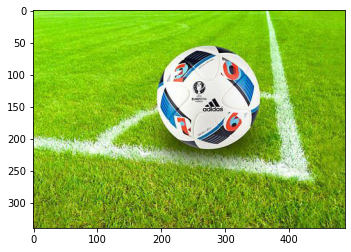

In [ ]:
img = image.load_img(files[-1], color_mode='rgb', target_size = (299,299) )
img = image.img_to_array(img)
img = img.reshape((-1,299,299,3))
print(f'preprocess 전, 최대값: {np.max(img)}, 최소값: {np.min(img)}')

img = preprocess_input(img)
print(f'preprocess 후, 최대값: {np.max(img)}, 최소값: {np.min(img)}')

features = model.predict(img)
print(decode_predictions(features, top=3))

plt.imshow(image.load_img(files[-1]))
plt.show()

### 이미지가 여러 장이라면

In [ ]:
images = []

for path in files :
    img = image.load_img(path, grayscale = False, target_size = (299,299) )
    img = image.img_to_array(img)
    img = preprocess_input(img)
    images.append(img)
    
images = np.array(images)    

In [ ]:
features = model.predict(images)
predictions = decode_predictions(features, top=3)

for i in range(images.shape[0]) :
    print(predictions[i])
    plt.imshow(image.load_img(files[i]))
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

## 매우매우 너무너무 중요한 Exercise!

* 강아지로 한다. (싫으면 다른거 하나 정하자.)
* 잘 되는 강아지 이미지 10 개 찾아보자.
* 안 되는 강아지 이미지 10 개 찾아보자.
---
- 경로 설정
    - my_data 폴더 안에 img2를 만들고 수집한 이미지를 넣으세요.

1/1 [==============================] - 1s 1s/step
[('n02086646', 'Blenheim_spaniel', 0.92605346), ('n02085782', 'Japanese_spaniel', 0.0076757404), ('n02102480', 'Sussex_spaniel', 0.0039259237)]


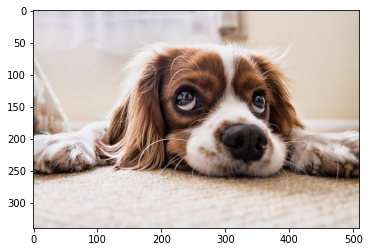

[('n02113186', 'Cardigan', 0.45118907), ('n02110806', 'basenji', 0.23054837), ('n02113023', 'Pembroke', 0.18429539)]


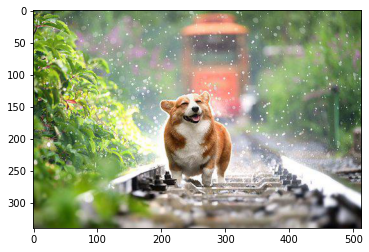

[('n02108915', 'French_bulldog', 0.86720765), ('n02096585', 'Boston_bull', 0.015133191), ('n02087046', 'toy_terrier', 0.002806634)]


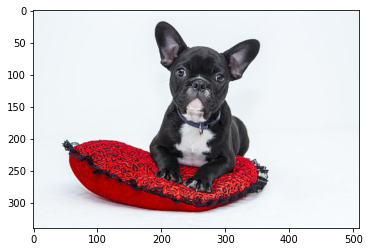

[('n02104029', 'kuvasz', 0.24523562), ('n02111500', 'Great_Pyrenees', 0.068641506), ('n02099712', 'Labrador_retriever', 0.041974258)]


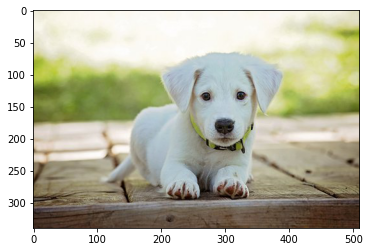

[('n02100583', 'vizsla', 0.8781043), ('n02092339', 'Weimaraner', 0.054962706), ('n02087394', 'Rhodesian_ridgeback', 0.004535085)]


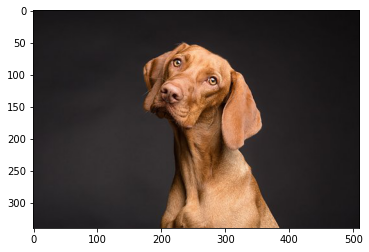

[('n02108915', 'French_bulldog', 0.9170007), ('n02096585', 'Boston_bull', 0.0020225728), ('n02085620', 'Chihuahua', 0.0013399568)]


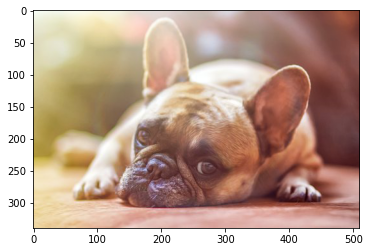

[('n02089078', 'black-and-tan_coonhound', 0.5864858), ('n02107312', 'miniature_pinscher', 0.021217037), ('n02090379', 'redbone', 0.019707834)]


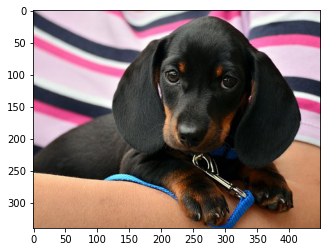

[('n02100583', 'vizsla', 0.52457815), ('n02108422', 'bull_mastiff', 0.097750954), ('n02099849', 'Chesapeake_Bay_retriever', 0.04800825)]


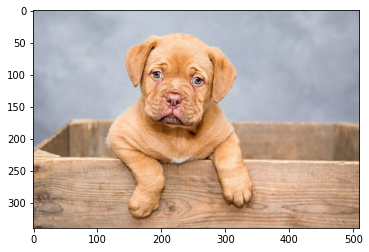

[('n02099601', 'golden_retriever', 0.85286057), ('n02099712', 'Labrador_retriever', 0.10965394), ('n02104029', 'kuvasz', 0.002863566)]


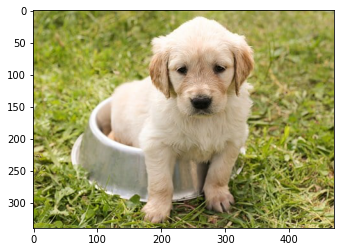

[('n02099601', 'golden_retriever', 0.6226873), ('n02099712', 'Labrador_retriever', 0.2634721), ('n04409515', 'tennis_ball', 0.0047559724)]


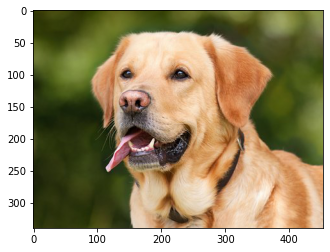

[('n02085936', 'Maltese_dog', 0.9032171), ('n02098413', 'Lhasa', 0.028430922), ('n02098286', 'West_Highland_white_terrier', 0.008475978)]


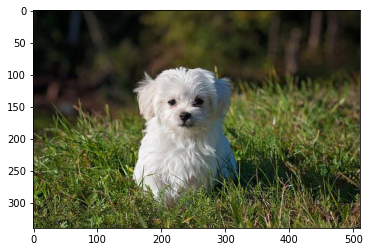

In [16]:
files = glob.glob('/content/drive/MyDrive/my_data/img2/*')
images = []

for path in files :
    img = image.load_img(path, grayscale = False, target_size = (299,299) )
    img = image.img_to_array(img)
    img = preprocess_input(img)
    images.append(img)
    
images = np.array(images)    

features = model.predict(images)
predictions = decode_predictions(features, top=3)

for i in range(images.shape[0]) :
    print(predictions[i])
    plt.imshow(image.load_img(files[i]))
    plt.show()

1/1 [==============================] - 1s 1s/step
[('n02417914', 'ibex', 0.23317467), ('n09193705', 'alp', 0.15203418), ('n02415577', 'bighorn', 0.094822176)]


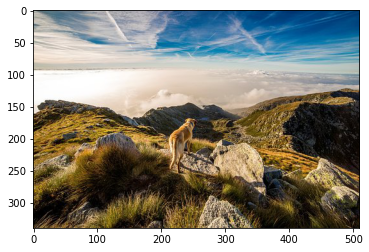

[('n02099267', 'flat-coated_retriever', 0.30407372), ('n02099712', 'Labrador_retriever', 0.11488007), ('n02111277', 'Newfoundland', 0.072741136)]


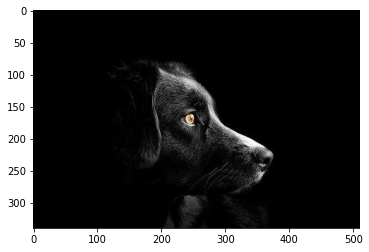

[('n02091244', 'Ibizan_hound', 0.08979124), ('n02090622', 'borzoi', 0.07890887), ('n02091134', 'whippet', 0.07299869)]


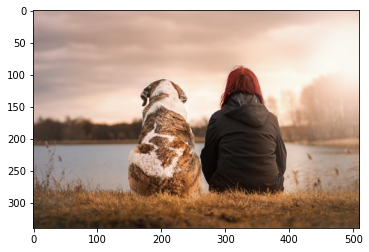

[('n02086240', 'Shih-Tzu', 0.32951847), ('n02098413', 'Lhasa', 0.13470027), ('n02086079', 'Pekinese', 0.11546884)]


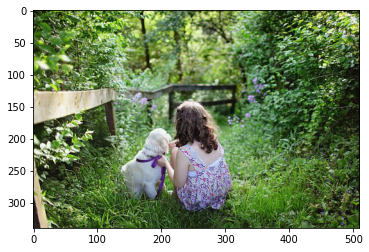

[('n02096585', 'Boston_bull', 0.7796232), ('n02108915', 'French_bulldog', 0.16744696), ('n02108089', 'boxer', 0.00398076)]


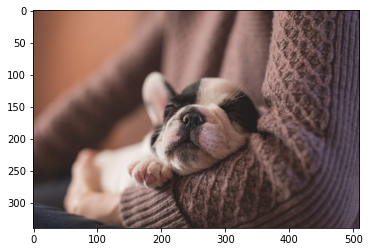

[('n02096585', 'Boston_bull', 0.7202897), ('n02965783', 'car_mirror', 0.068601586), ('n02108915', 'French_bulldog', 0.026093522)]


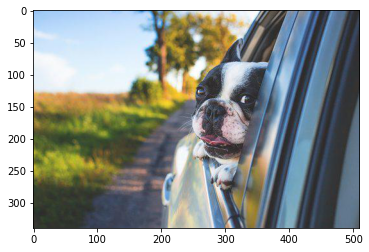

[('n02087394', 'Rhodesian_ridgeback', 0.3000788), ('n02110806', 'basenji', 0.1386426), ('n02100583', 'vizsla', 0.10113159)]


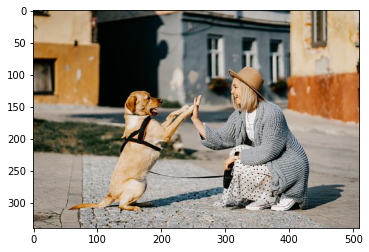

[('n02109961', 'Eskimo_dog', 0.17844701), ('n03218198', 'dogsled', 0.112359844), ('n02110063', 'malamute', 0.0606349)]


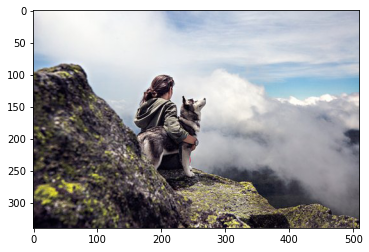

In [17]:
files = glob.glob('/content/drive/MyDrive/my_data/img3/*')
images = []

for path in files :
    img = image.load_img(path, grayscale = False, target_size = (299,299) )
    img = image.img_to_array(img)
    img = preprocess_input(img)
    images.append(img)
    
images = np.array(images)    

features = model.predict(images)
predictions = decode_predictions(features, top=3)

for i in range(images.shape[0]) :
    print(predictions[i])
    plt.imshow(image.load_img(files[i]))
    plt.show()

1/1 [==============================] - 0s 54ms/step
[('n03595614', 'jersey', 0.7471147), ('n06596364', 'comic_book', 0.13168344), ('n03642806', 'laptop', 0.032758478)]


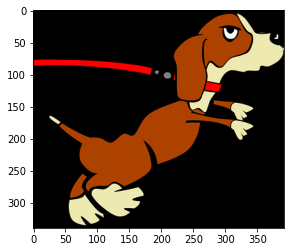

[('n06596364', 'comic_book', 0.3247485), ('n04591157', 'Windsor_tie', 0.18640238), ('n02730930', 'apron', 0.13233674)]


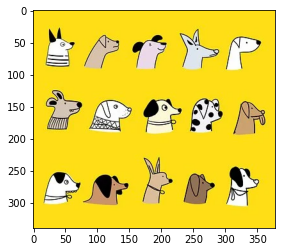

[('n02085620', 'Chihuahua', 0.91395), ('n02096585', 'Boston_bull', 0.006906285), ('n02087046', 'toy_terrier', 0.0064392686)]


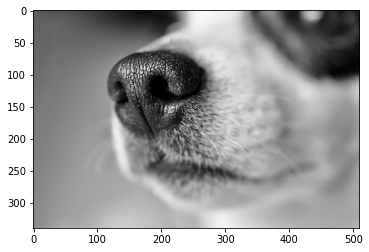

[('n01819313', 'sulphur-crested_cockatoo', 0.53856814), ('n01608432', 'kite', 0.043098684), ('n01796340', 'ptarmigan', 0.020518996)]


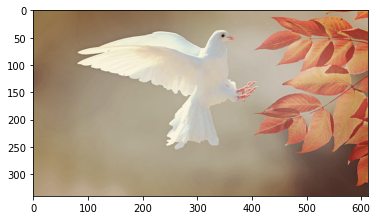

[('n01580077', 'jay', 0.65293807), ('n01828970', 'bee_eater', 0.14510779), ('n01531178', 'goldfinch', 0.01434593)]


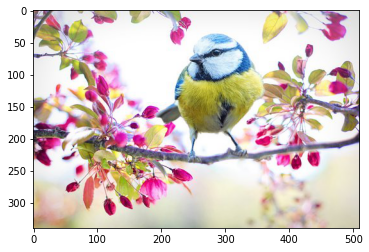

[('n01806143', 'peacock', 0.96214217), ('n02165105', 'tiger_beetle', 0.00081343687), ('n02169497', 'leaf_beetle', 0.0007001485)]


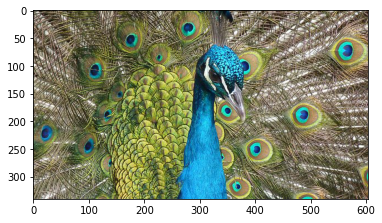

[('n03944341', 'pinwheel', 0.2564485), ('n02782093', 'balloon', 0.2375973), ('n03814906', 'necklace', 0.019066224)]


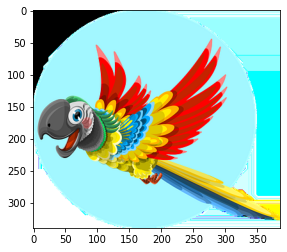

[('n01820546', 'lorikeet', 0.789967), ('n01818515', 'macaw', 0.05990842), ('n01819313', 'sulphur-crested_cockatoo', 0.0028980887)]


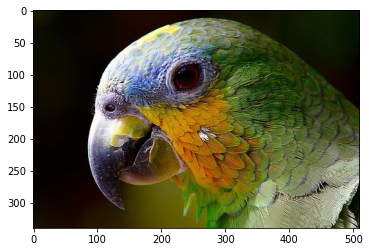

In [18]:
files = glob.glob('/content/drive/MyDrive/my_data/img4/*')
images = []

for path in files :
    img = image.load_img(path, grayscale = False, target_size = (299,299) )
    img = image.img_to_array(img)
    img = preprocess_input(img)
    images.append(img)
    
images = np.array(images)    

features = model.predict(images)
predictions = decode_predictions(features, top=3)

for i in range(images.shape[0]) :
    print(predictions[i])
    plt.imshow(image.load_img(files[i]))
    plt.show()